# The shopping analysis notebook 

import some libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

load the dataset from csv file                                                                                                                            
know information about the dataset

In [2]:
shopping = pd.read_csv('shopping_trends.csv' , index_col=0)
shopping.head()


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Code Us

In [4]:
shopping.shape

(3900, 18)

In [5]:
shopping.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


check for dublicated and missing values in shopping 

In [6]:
shopping.isnull().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
print(shopping.duplicated().sum())

0


no duplicated and no missing values in shopping                                                                                                          
show the outliers 

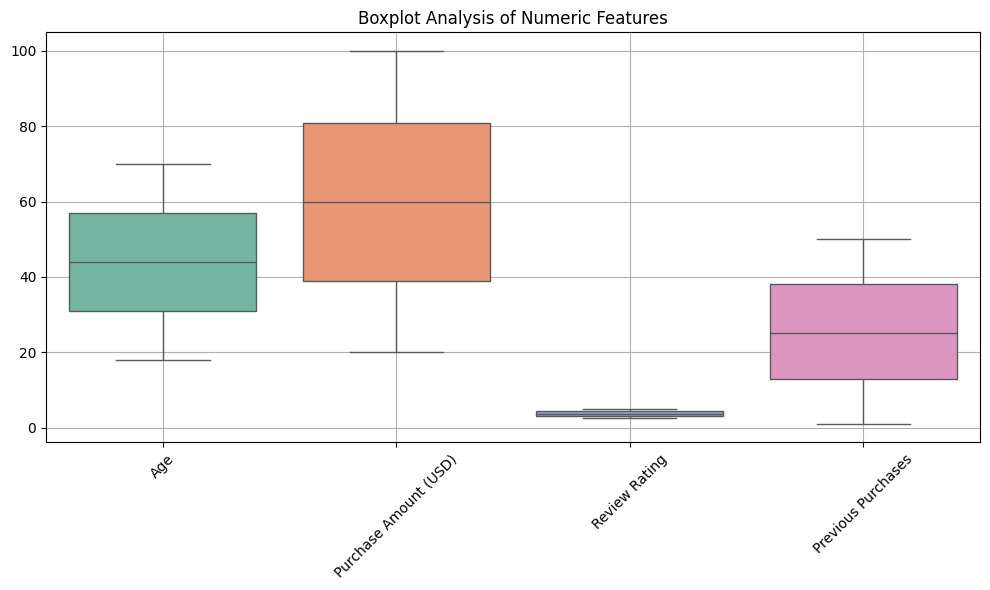

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=shopping, palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot Analysis of Numeric Features")
plt.grid(True)
plt.tight_layout()
plt.show()

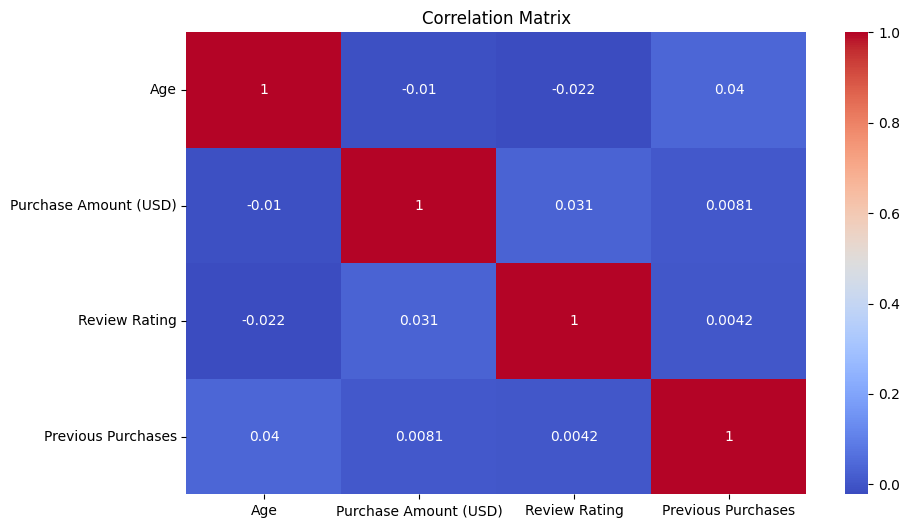

In [9]:
# drow a corroliation matrix
numircals = shopping.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numircals.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## Data cleaning and preprocessing

convert some features to categorical features or boolean features or numerical features

In [27]:
shopping['Promo Code Used'] = shopping['Promo Code Used'].map({'Yes': True, 'No': False}).astype(bool)
shopping['Discount Applied'] = shopping['Discount Applied'].map({'Yes': True, 'No': False}).astype(bool)
shopping['Subscription Status'] = shopping['Subscription Status'].map({'Yes': True, 'No': False}).astype(bool)

In [14]:
shopping['Size'] = shopping['Size'].astype('category')
shopping['Color'] = shopping['Color'].astype('category')
shopping['Season'] = shopping['Season'].astype('category')
shopping['Item Purchased'] = shopping['Item Purchased'].astype('category')
shopping['Category'] = shopping['Category'].astype('category')
shopping['Gender'] = shopping['Gender'].astype('category')

In [ ]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       3900 non-null   int64   
 1   Gender                    3900 non-null   category
 2   Item Purchased            3900 non-null   category
 3   Category                  3900 non-null   category
 4   Purchase Amount (USD)     3900 non-null   int64   
 5   Location                  3900 non-null   object  
 6   Size                      3900 non-null   category
 7   Color                     3900 non-null   category
 8   Season                    3900 non-null   category
 9   Review Rating             3900 non-null   float64 
 10  Subscription Status       3900 non-null   object  
 11  Payment Method            3900 non-null   object  
 12  Shipping Type             3900 non-null   object  
 13  Discount Applied          3900 non-null   bool    
 1

generate some another usefully columns from the columns

In [ ]:
kinds_shopping = {
    'Clothing': 'Apparel',
    'Footwear': 'Apparel',
    'Accessories': 'Fashion',
    'Electronics': 'Technology',
    'Home Decor': 'Home & Living',
    'Furniture': 'Home & Living',
    'Beauty': 'Personal Care'
}

shopping['kinds_shopping'] = shopping['Category'].map(kinds_shopping).fillna('Other')


print(shopping[['Category', 'kinds_shopping']].head(20))


                Category kinds_shopping
Customer ID                            
1               Clothing        Apparel
2               Clothing        Apparel
3               Clothing        Apparel
4               Footwear        Apparel
5               Clothing        Apparel
6               Footwear        Apparel
7               Clothing        Apparel
8               Clothing        Apparel
9              Outerwear          Other
10           Accessories        Fashion
11              Footwear        Apparel
12              Clothing        Apparel
13             Outerwear          Other
14              Clothing        Apparel
15             Outerwear          Other
16              Clothing        Apparel
17           Accessories        Fashion
18              Clothing        Apparel
19              Clothing        Apparel
20              Clothing        Apparel


In [37]:
# Feature: Age Group
shopping['Kind_age'] = pd.cut(shopping['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'older'])

# Feature: Spending Behavior
shopping['High Spender'] = (shopping['Purchase Amount (USD)'] > 75).astype(int)
shopping['Low Spender'] = (shopping['Purchase Amount (USD)'] < 25).astype(int)

# Feature: Loyalty Status
shopping['Loyalty Status'] = (shopping['Purchase Amount (USD)'] > 100).astype(int)


In [38]:
shopping.head()


,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,kinds_shopping,Kind_age,High Spender,Low Spender,Loyalty Status
Customer ID,,,,,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,...,True,True,14,Venmo,Fortnightly,Apparel,older,0,0,0
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,...,True,True,2,Cash,Fortnightly,Apparel,Young,0,0,0
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,True,True,23,Credit Card,Weekly,Apparel,Middle-aged,0,0,0
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,...,True,True,49,PayPal,Weekly,Apparel,Young,1,0,0
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,...,True,True,31,PayPal,Annually,Apparel,Middle-aged,0,0,0


In [99]:
shopping.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,High Spender,Low Spender,Loyalty Status
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.0
mean,44.068462,59.764359,3.749949,25.351538,0.311282,0.063846,0.0
std,15.207589,23.685392,0.716223,14.447125,0.463077,0.244510,0.0
min,18.000000,20.000000,2.500000,1.000000,0.000000,0.000000,0.0
25%,31.000000,39.000000,3.100000,13.000000,0.000000,0.000000,0.0
50%,44.000000,60.000000,3.700000,25.000000,0.000000,0.000000,0.0
75%,57.000000,81.000000,4.400000,38.000000,1.000000,0.000000,0.0
max,70.000000,100.000000,5.000000,50.000000,1.000000,1.000000,0.0


In [100]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3900 entries, 1 to 3900
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       3900 non-null   int64   
 1   Gender                    3900 non-null   category
 2   Item Purchased            3900 non-null   category
 3   Category                  3900 non-null   category
 4   Purchase Amount (USD)     3900 non-null   int64   
 5   Location                  3900 non-null   object  
 6   Size                      3900 non-null   category
 7   Color                     3900 non-null   category
 8   Season                    3900 non-null   category
 9   Review Rating             3900 non-null   float64 
 10  Subscription Status       3900 non-null   bool    
 11  Payment Method            3900 non-null   object  
 12  Shipping Type             3900 non-null   object  
 13  Discount Applied          3900 non-null   bool    
 1

## Statistical Analysis of the shopping

In [95]:
# Select numeric columns
numircals = shopping.select_dtypes(include=['number'])

# Calculate quartiles and IQR
Q1 = shopping[numircals.columns].quantile(0.25)
Q2 = shopping[numircals.columns].quantile(0.5)
Q3 = shopping[numircals.columns].quantile(0.75)
IQR = Q3 - Q1

# Print results
print(f'The first quartile (Q1) is:\n{Q1}\n')
print(f'The second quartile (Q2) is:\n{Q2}\n')
print(f'The third quartile (Q3) is:\n{Q3}\n')
print(f'The interquartile range (IQR) is:\n{IQR}\n')





The first quartile (Q1) is:
Age                      31.0
Purchase Amount (USD)    39.0
Review Rating             3.1
Previous Purchases       13.0
High Spender              0.0
Low Spender               0.0
Loyalty Status            0.0
Name: 0.25, dtype: float64

The second quartile (Q2) is:
Age                      44.0
Purchase Amount (USD)    60.0
Review Rating             3.7
Previous Purchases       25.0
High Spender              0.0
Low Spender               0.0
Loyalty Status            0.0
Name: 0.5, dtype: float64

The third quartile (Q3) is:
Age                      57.0
Purchase Amount (USD)    81.0
Review Rating             4.4
Previous Purchases       38.0
High Spender              1.0
Low Spender               0.0
Loyalty Status            0.0
Name: 0.75, dtype: float64

The interquartile range (IQR) is:
Age                      26.0
Purchase Amount (USD)    42.0
Review Rating             1.3
Previous Purchases       25.0
High Spender              1.0
Low Spender       

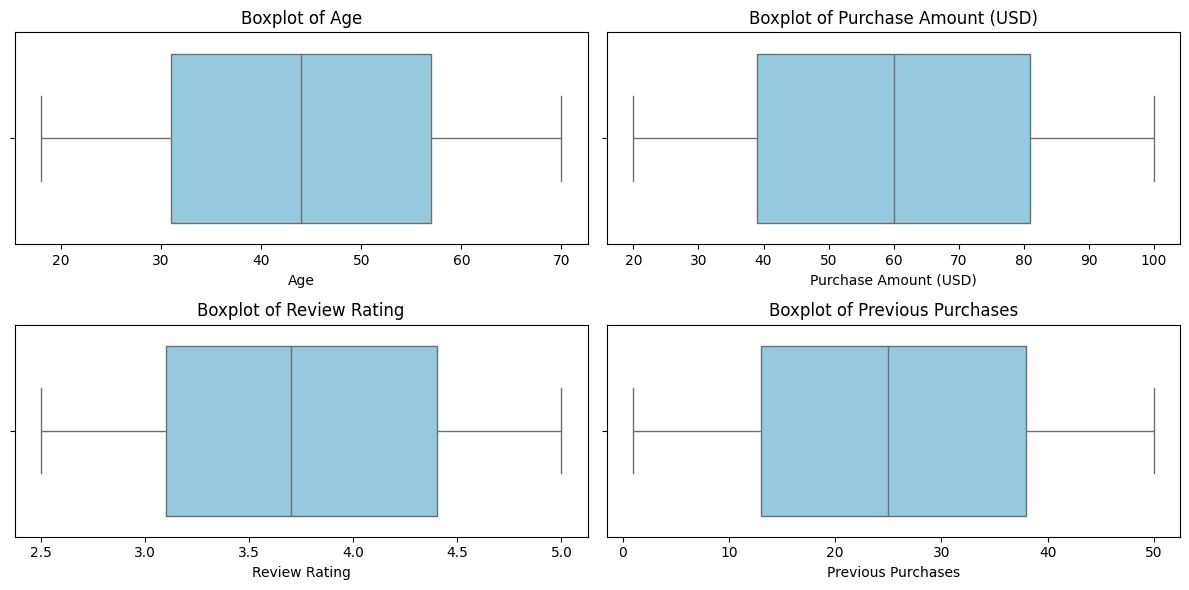

In [97]:
# Select numerical columns
numerical_cols = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
plt.figure(figsize=(12, 6))

# Boxplot for outlier detection
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=shopping[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


## Data Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\1646185909.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shopping['Gender'].value_counts().index,


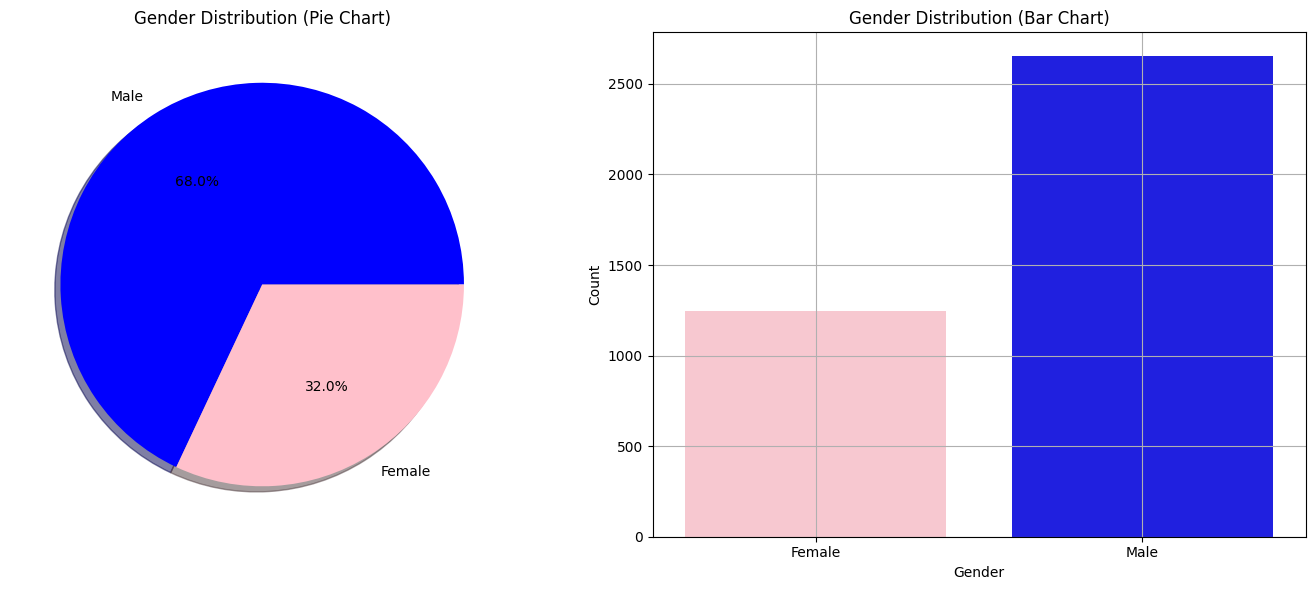

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# PIE CHART 
axes[0].pie(shopping['Gender'].value_counts(), 
            labels=shopping['Gender'].value_counts().index, 
            autopct="%.1f%%", shadow=True, colors=["blue", "pink"])
axes[0].set_title("Gender Distribution (Pie Chart)")

# BAR CHART
sns.barplot(x=shopping['Gender'].value_counts().index, 
            y=shopping['Gender'].value_counts().values, 
            ax=axes[1], palette=["pink", "blue"])
axes[1].set_title("Gender Distribution (Bar Chart)")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\1172585906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=shopping, order=shopping['Category'].value_counts().index, palette="coolwarm")


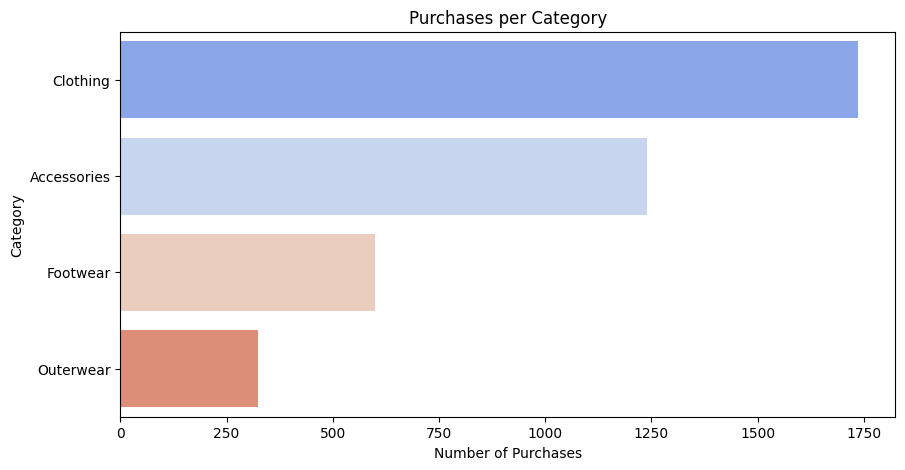

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(y="Category", data=shopping, order=shopping['Category'].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Purchases")
plt.ylabel("Category")
plt.title("Purchases per Category")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\4045862583.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="kinds_shopping", data=shopping, order=shopping['kinds_shopping'].value_counts().index, palette="coolwarm")


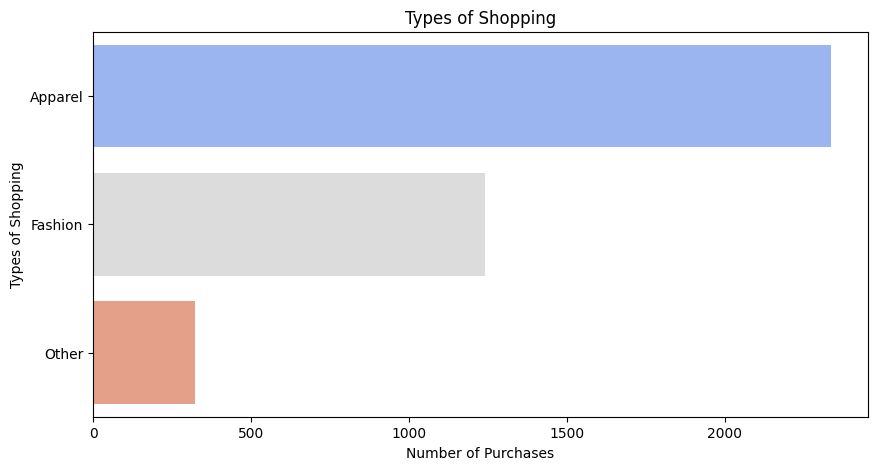

In [90]:
plt.figure(figsize=(10,5))
sns.countplot(y="kinds_shopping", data=shopping, order=shopping['kinds_shopping'].value_counts().index, palette="coolwarm")
plt.xlabel("Number of Purchases")
plt.ylabel("Types of Shopping")
plt.title("Types of Shopping")
plt.show()

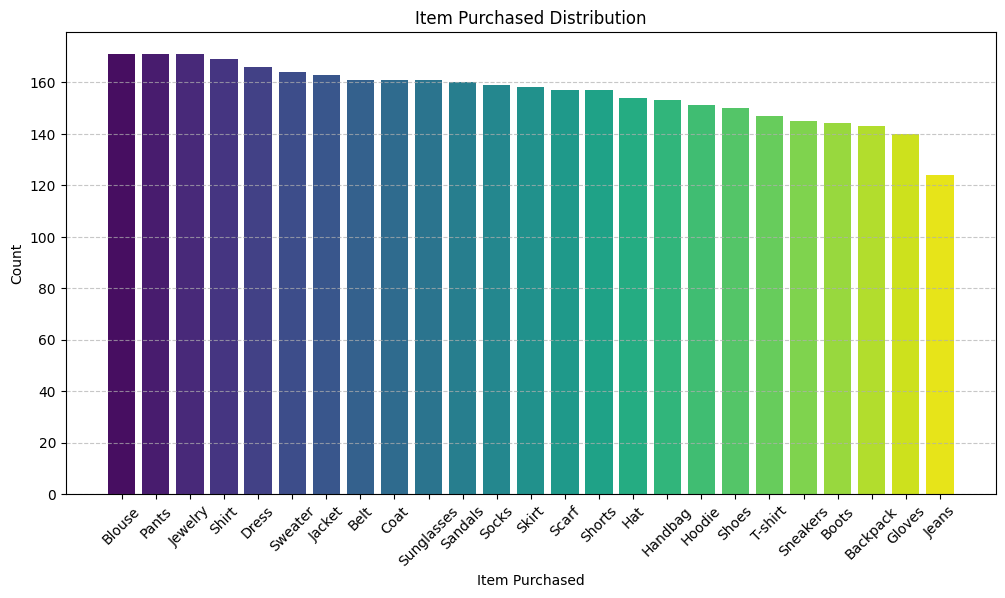

In [52]:
item_counts = shopping['Item Purchased'].value_counts()
plt.figure(figsize=(12, 6))
plt.bar(item_counts.index, item_counts.values, color=sns.color_palette("viridis", len(item_counts)))
plt.title("Item Purchased Distribution")
plt.xlabel("Item Purchased")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\1966880031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Kind_age", y="Purchase Amount (USD)", data=shopping, palette="coolwarm")


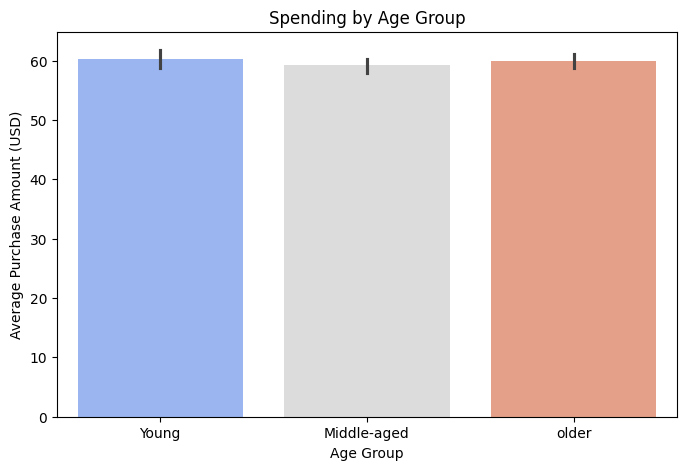

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x="Kind_age", y="Purchase Amount (USD)", data=shopping, palette="coolwarm")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount (USD)")
plt.title("Spending by Age Group")
plt.show()


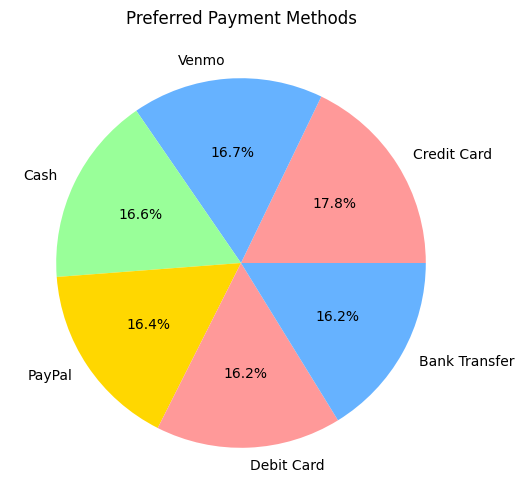

In [58]:
plt.figure(figsize=(6,6))
shopping['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#FF9999", "#66B2FF", "#99FF99", "#FFD700"])
plt.title("Preferred Payment Methods")
plt.ylabel("")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\2039419114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Low Spender", data=shopping, palette="coolwarm", ax=axis[0])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\2039419114.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="High Spender", data=shopping, palette="coolwarm", ax=axis[1])


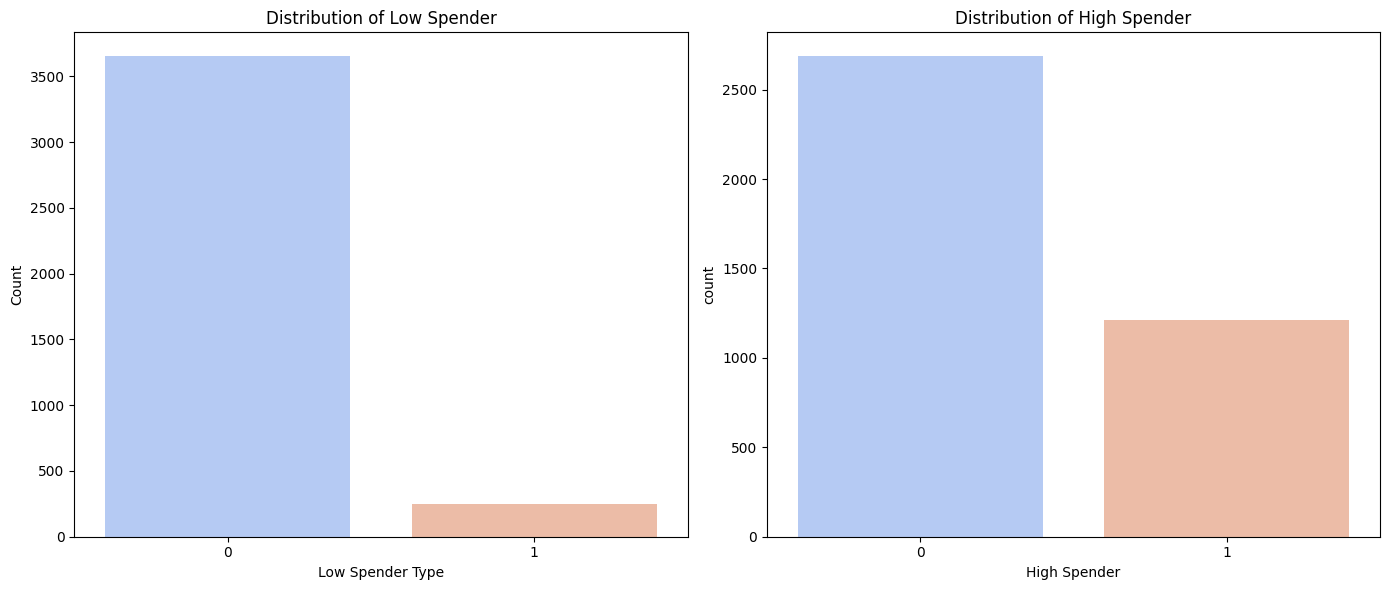

In [66]:
fig, axis = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x="Low Spender", data=shopping, palette="coolwarm", ax=axis[0])
axis[0].set_xlabel("Low Spender Type")
axis[0].set_ylabel("Count")
axis[0].set_title("Distribution of Low Spender")


sns.countplot(x="High Spender", data=shopping, palette="coolwarm", ax=axis[1])
axis[1].set_xlabel("High Spender")
axis[1].set_ylabel("count")
axis[1].set_title("Distribution of High Spender")

plt.tight_layout()
plt.show()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\805555570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loyalty Status", y="Purchase Amount (USD)", data=shopping, palette="coolwarm")


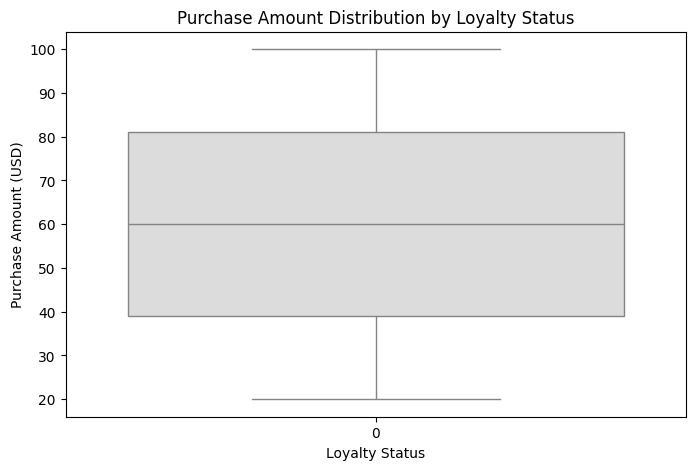

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Loyalty Status", y="Purchase Amount (USD)", data=shopping, palette="coolwarm")
plt.xlabel("Loyalty Status")
plt.ylabel("Purchase Amount (USD)")
plt.title("Purchase Amount Distribution by Loyalty Status")
plt.show()

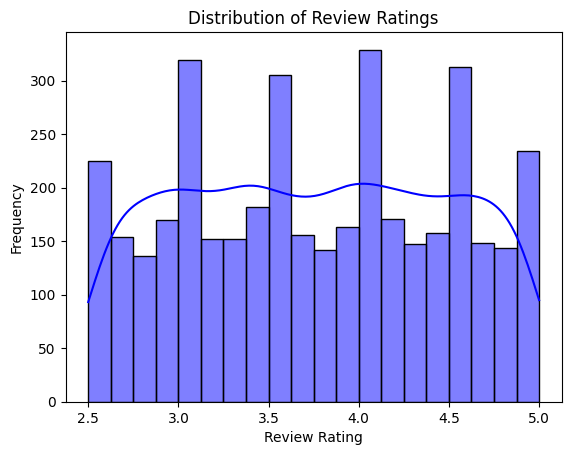

In [75]:
plt.Figure(figsize=(14,8))
sns.histplot(shopping['Review Rating'], bins=20, kde=True, color='blue')
plt.xlabel("Review Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Review Ratings")
plt.show()


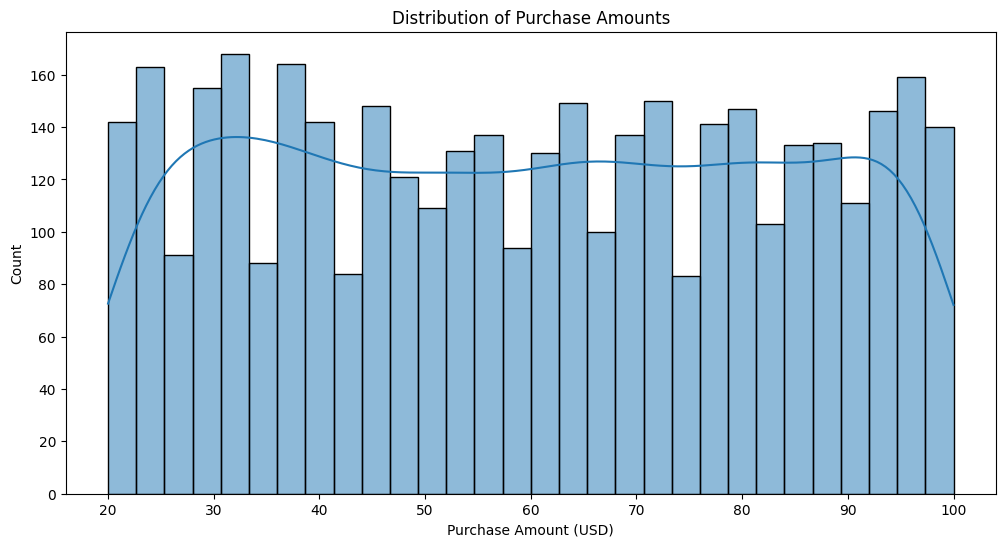

In [77]:
plt.figure(figsize=(12,6))
sns.histplot(shopping['Purchase Amount (USD)'], kde=True, bins=30)
plt.title('Distribution of Purchase Amounts')
plt.show()

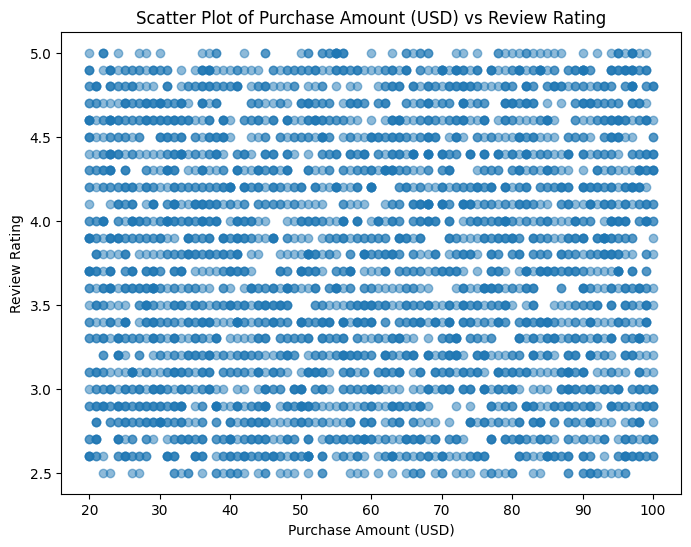

In [71]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(shopping['Purchase Amount (USD)'], shopping['Review Rating'], alpha=0.5)
ax.set_xlabel('Purchase Amount (USD)')
ax.set_ylabel('Review Rating')
ax.set_title('Scatter Plot of Purchase Amount (USD) vs Review Rating')
plt.show()

In [82]:
season_counts = shopping['Season'].value_counts()
avg_purchase_season = shopping.groupby('Season')['Purchase Amount (USD)'].mean()
high_spenders_season = shopping.groupby('Season')['High Spender'].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\2141601921.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_season = shopping.groupby('Season')['Purchase Amount (USD)'].mean()
C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\2141601921.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_spenders_season = shopping.groupby('Season')['High Spender'].sum()


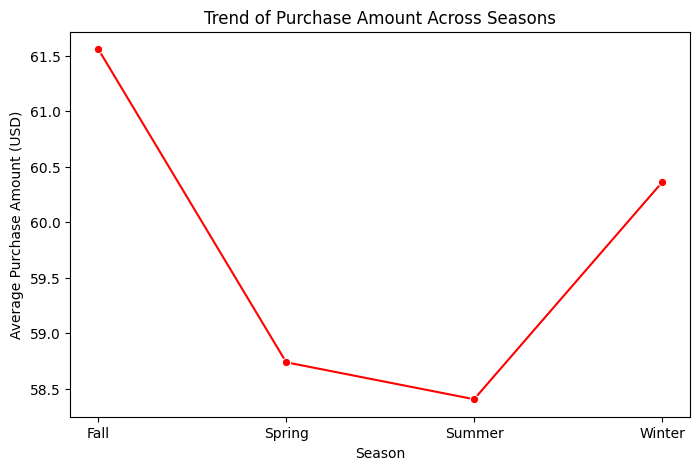

In [84]:
plt.figure(figsize=(8,5))
sns.lineplot(data=avg_purchase_season, marker="o", color="red")
plt.xlabel("Season")
plt.ylabel("Average Purchase Amount (USD)")
plt.title("Trend of Purchase Amount Across Seasons")
plt.show()


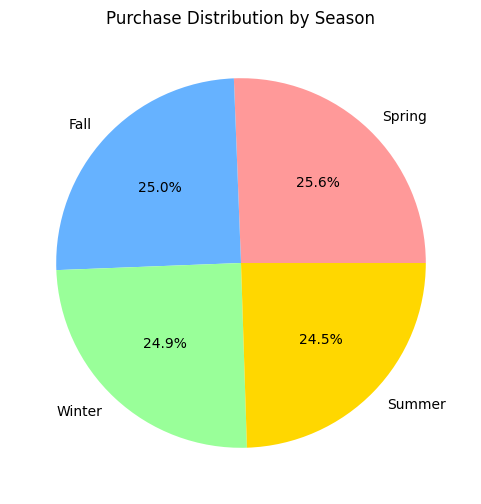

In [85]:
plt.figure(figsize=(6,6))
shopping['Season'].value_counts().plot.pie(autopct='%1.1f%%', colors=["#FF9999", "#66B2FF", "#99FF99", "#FFD700"])
plt.title("Purchase Distribution by Season")
plt.ylabel("")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\2530258630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Season", y="Purchase Amount (USD)", data=shopping, palette="coolwarm")


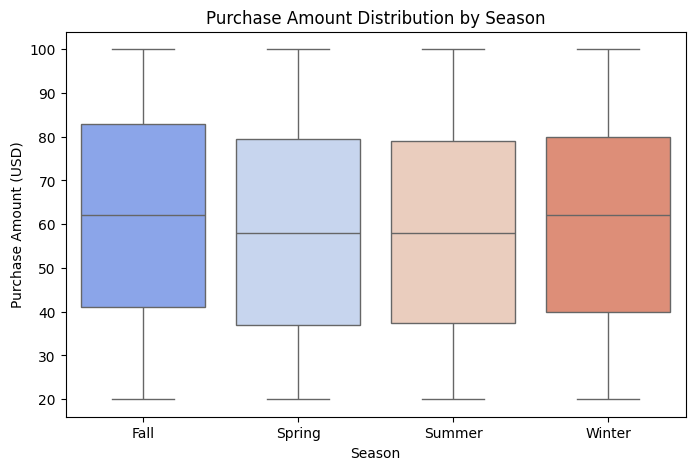

In [86]:

plt.figure(figsize=(8,5))
sns.boxplot(x="Season", y="Purchase Amount (USD)", data=shopping, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")
plt.title("Purchase Amount Distribution by Season")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\2568529245.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")


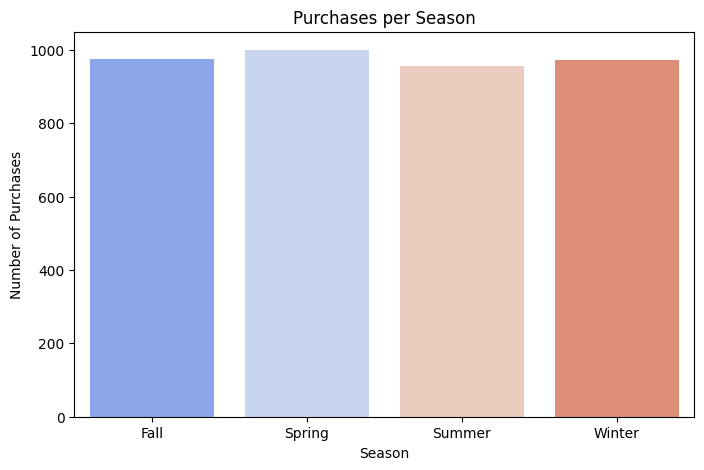

In [87]:
plt.figure(figsize=(8,5))
sns.barplot(x=season_counts.index, y=season_counts.values, palette="coolwarm")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.title("Purchases per Season")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_9536\1234161580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_count.index, y=frequency_count.values, palette="coolwarm")


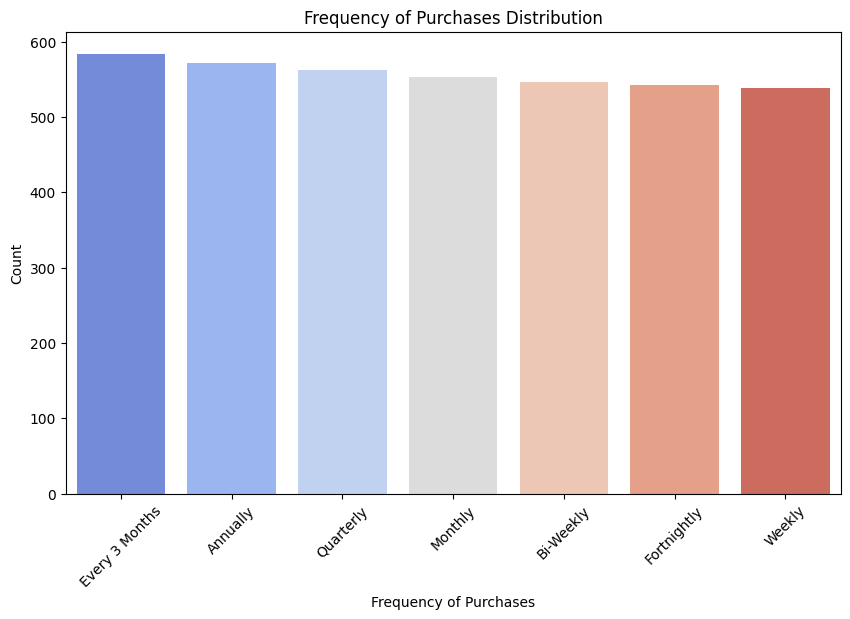

In [91]:
frequency_count = shopping['Frequency of Purchases'].value_counts()
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency_count.index, y=frequency_count.values, palette="coolwarm")
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases Distribution')
plt.xticks(rotation=45)  
plt.show()
